# Azizu Ahmad Rozaki Riyanto
# azizu.rozaki@gmail.com

# Dataset : https://www.kaggle.com/datasets/alessiocorrado99/animals10


In [80]:
import pandas as pd
import os
import numpy as np
import tensorflow as tf
from tqdm import tqdm
import random
import pathlib
import cv2
from PIL import Image


In [81]:
np.random.seed(0)
tf.random.set_seed(0)

In [82]:
dataset_dir = "/kaggle/input/animal/raw-img"

In [83]:
category = os.listdir(dataset_dir)

length = len(category)
print(f"This Dataset have : {length} label")

print(f"\nThe label is: ")
for label in category:
    print(label)


This Dataset have : 10 label

The label is: 
cavallo
pecora
elefante
gatto
scoiattolo
gallina
ragno
mucca
cane
farfalla


In [84]:
totalData = 0

for label in category:
    # Create the full path to the label's directory
    label_dir = os.path.join(dataset_dir, label)
    
    # List all files in the label's directory
    file_list = os.listdir(label_dir)
    
    # Count the number of images for the label
    num_images = len(file_list)
    totalData = totalData + num_images
    
    # Print the label and the number of images
    print(f"Label {label} : {num_images}")
    
print(f"\nTotal Dataset : {totalData}")

Label cavallo : 2623
Label pecora : 1820
Label elefante : 1446
Label gatto : 1668
Label scoiattolo : 1862
Label gallina : 3098
Label ragno : 4821
Label mucca : 1866
Label cane : 4863
Label farfalla : 2112

Total Dataset : 26179


In [85]:
for i in category:
    dir = os.path.join(dataset_dir, i)
    y = len(os.listdir(dir))
    print(i,'=', y)

    img_name = os.listdir(dir)
    for j in range(10):
        img_path = os.path.join(dir, img_name[j])
        img = Image.open(img_path)
        print(img.size)
    print('=========')

cavallo = 2623
(225, 300)
(200, 300)
(300, 197)
(300, 169)
(300, 225)
(300, 252)
(300, 225)
(300, 300)
(300, 213)
(300, 199)
pecora = 1820
(300, 201)
(640, 442)
(640, 426)
(300, 257)
(640, 428)
(300, 225)
(300, 225)
(300, 157)
(300, 160)
(300, 225)
elefante = 1446
(300, 199)
(300, 225)
(300, 225)
(640, 423)
(300, 227)
(300, 200)
(300, 216)
(640, 426)
(640, 359)
(300, 150)
gatto = 1668
(300, 200)
(300, 225)
(300, 222)
(269, 194)
(300, 225)
(300, 188)
(300, 225)
(300, 169)
(300, 164)
(300, 247)
scoiattolo = 1862
(250, 250)
(174, 300)
(225, 300)
(199, 300)
(300, 169)
(270, 194)
(300, 200)
(300, 150)
(300, 200)
(300, 200)
gallina = 3098
(300, 225)
(283, 300)
(300, 253)
(300, 200)
(225, 300)
(300, 225)
(300, 268)
(300, 225)
(300, 216)
(300, 229)
ragno = 4821
(300, 293)
(300, 210)
(300, 225)
(300, 214)
(300, 225)
(300, 235)
(300, 199)
(300, 239)
(300, 233)
(300, 281)
mucca = 1866
(300, 214)
(300, 200)
(300, 169)
(300, 220)
(300, 169)
(300, 205)
(300, 225)
(300, 225)
(300, 184)
(300, 188)
can

In [86]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.densenet import preprocess_input as densePI


In [87]:
size = (250 ,250)
batch = 32
valSplit = 0.2

In [88]:
dataGenerator = ImageDataGenerator(
#     rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.3,
    zoom_range=0.3,
    fill_mode = 'nearest',
    preprocessing_function = densePI,
    validation_split = valSplit
)
train_data = dataGenerator.flow_from_directory(
    directory = dataset_dir,
    target_size= size,
    class_mode='categorical',
    batch_size = batch,
    shuffle = True,
    subset="training",
    seed = 0
)

valid_data = dataGenerator.flow_from_directory(
    directory = dataset_dir,
    target_size= size,
    class_mode='categorical',
    batch_size = batch,
    shuffle = False,
    subset="validation",
    seed = 0
)


Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


In [89]:
x,y = train_data.next()
i,j = valid_data.next()

print(f"Train shape : {x.shape},{y.shape} \n")
print(f"Valid shape : {i.shape},{j.shape} \n")

Train shape : (32, 250, 250, 3),(32, 10) 

Valid shape : (32, 250, 250, 3),(32, 10) 



In [90]:
from tensorflow.keras.optimizers.experimental import Adamax
from tensorflow.keras.models import Model
import time
from sklearn.metrics import classification_report, confusion_matrix ,multilabel_confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import EfficientNetB0
import matplotlib.pyplot as plt

In [91]:
def grafik(hist):

    loss = hist.history['loss']
    val_loss = hist.history['val_loss']

    plt.plot(loss, 'b', label='Training loss')
    plt.plot(val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(os.path.join(folder_path, f"loss.png"))
    plt.show()

    
    acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    plt.plot(acc, 'b', label='Training acc')
    plt.plot(val_acc, 'r', label='Validation acc')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc = 'lower right')
    plt.savefig(os.path.join(folder_path, f"accuracy.png"))
    plt.show()

In [92]:
input_shape = (250, 250, 3)

In [93]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)

for layer in base_model.layers :
    layer.trainable = True

model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer= Adamax(learning_rate = 0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 8, 8, 1280)        4049571   
 )                                                               
                                                                 
 conv2d_52 (Conv2D)          (None, 6, 6, 32)          368672    
                                                                 
 max_pooling2d_49 (MaxPooli  (None, 3, 3, 32)          0         
 ng2D)                                                           
                                                                 
 global_average_pooling2d_4  (None, 32)                0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_25 (Flatten)        (None, 32)                0         
                                                     

In [94]:
def lr_schedule(epoch, initial_lr=0.0001):
    return initial_lr * 0.9 ** epoch

In [95]:
folder_path = f"run/"

callbacks = [
            tf.keras.callbacks.ModelCheckpoint(os.path.join(folder_path, f"best_model.h5"), save_best_only=True, verbose=1),
            tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss', verbose=1),
            tf.keras.callbacks.TensorBoard(log_dir='logs'),
            tf.keras.callbacks.LearningRateScheduler(lr_schedule)
            ]

# Hitung waktu training
start_time = time.time()

# Training
history = model.fit(
    train_data,
    epochs=50,
    validation_data=(valid_data),
    callbacks=callbacks,
    batch_size=32,
)

# Hitung waktu training
end_time = time.time()

hsl = end_time - start_time

# Menampilkan lama proses training
print(f"Training Time : {hsl}")
print(round(hsl/60) , ' Menit')
print(round(hsl % 60), ' Detik')




Epoch 1/50


2024-02-02 04:00:15.556882: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_15/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


655/655 [==============================] - ETA: 0s - loss: 0.5709 - accuracy: 0.8204
Epoch 1: val_loss improved from inf to 0.23946, saving model to run/best_model.h5


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


655/655 [==============================] - 389s 546ms/step - loss: 0.5709 - accuracy: 0.8204 - val_loss: 0.2395 - val_accuracy: 0.9302 - lr: 1.0000e-04
Epoch 2/50
655/655 [==============================] - ETA: 0s - loss: 0.2160 - accuracy: 0.9334
Epoch 2: val_loss improved from 0.23946 to 0.13931, saving model to run/best_model.h5
655/655 [==============================] - 369s 562ms/step - loss: 0.2160 - accuracy: 0.9334 - val_loss: 0.1393 - val_accuracy: 0.9583 - lr: 9.0000e-05
Epoch 3/50
655/655 [==============================] - ETA: 0s - loss: 0.1756 - accuracy: 0.9461
Epoch 3: val_loss improved from 0.13931 to 0.10800, saving model to run/best_model.h5
655/655 [==============================] - 353s 539ms/step - loss: 0.1756 - accuracy: 0.9461 - val_loss: 0.1080 - val_accuracy: 0.9677 - lr: 7.2900e-05
Epoch 4/50
655/655 [==============================] - ETA: 0s - loss: 0.1560 - accuracy: 0.9522
Epoch 4: val_loss improved from 0.10800 to 0.09225, saving model to run/best_model.h

In [101]:
from sklearn.metrics import accuracy_score

164/164 [==============================] - 68s 406ms/step
Validation Accuracy: 97.38%
              precision    recall  f1-score   support

        cane       0.97      0.98      0.97       972
     cavallo       0.97      0.97      0.97       524
    elefante       0.98      0.98      0.98       289
    farfalla       0.99      0.98      0.98       422
     gallina       0.99      0.99      0.99       619
       gatto       0.97      0.95      0.96       333
       mucca       0.92      0.95      0.94       373
      pecora       0.96      0.95      0.95       364
       ragno       0.99      0.99      0.99       964
  scoiattolo       0.98      0.98      0.98       372

    accuracy                           0.97      5232
   macro avg       0.97      0.97      0.97      5232
weighted avg       0.97      0.97      0.97      5232



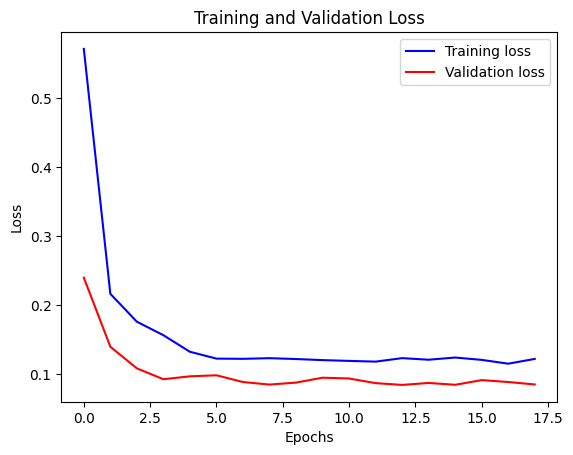

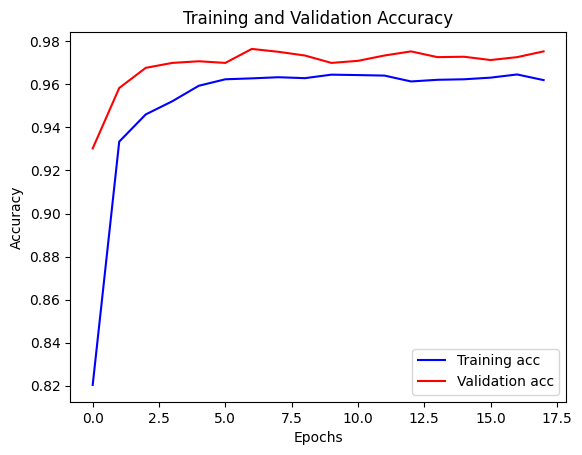

In [109]:
model = load_model('/kaggle/working/run/best_model.h5')

y_pred = model.predict(valid_data)
y_true = valid_data.classes
y_pred = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_true, y_pred)

print(f"Validation Accuracy: {accuracy * 100:.2f}%")

classification_rep = classification_report(y_true, y_pred, target_names=valid_data.class_indices)
print(classification_rep)

grafik(history)

In [112]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('modeltflite.tflite', 'wb') as f:
    f.write(tflite_model)